<a href="https://colab.research.google.com/github/VaishnaviMoorthy-SRM/Diabetes_prediction_using_RF/blob/main/Diabetes_mhc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries and modules


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Reading the data


In [21]:
data = pd.read_csv('mhc_mod.csv')

Explolatory Data Analysis (EDA)


In [22]:
print(data.describe())

               Age          Sex          BMI  Pulse_Per_Min      Glucose  \
count  8132.000000  8132.000000  8077.000000    8077.000000  8182.000000   
mean     44.884899     0.076119    25.987656      83.050019   101.624786   
std       8.734515     0.265205     6.426889      21.470351    36.775682   
min      19.000000     0.000000     0.000000       0.000000    46.000000   
25%      39.000000     0.000000    23.400000      73.000000    84.000000   
50%      45.000000     0.000000    25.700000      82.000000    90.000000   
75%      52.000000     0.000000    28.200000      91.000000   102.000000   
max      60.000000     1.000000   317.100000     990.000000   404.000000   

       Cholesterol    SGPT(ALT)   Creatinine  Triglycerides    Diagnosis  
count  8183.000000  8183.000000  8183.000000    8183.000000  8190.000000  
mean    190.690376    27.887551     0.869147     147.901647     0.533700  
std      38.799168    29.274992     0.170953     116.173701     0.498894  
min      69.120

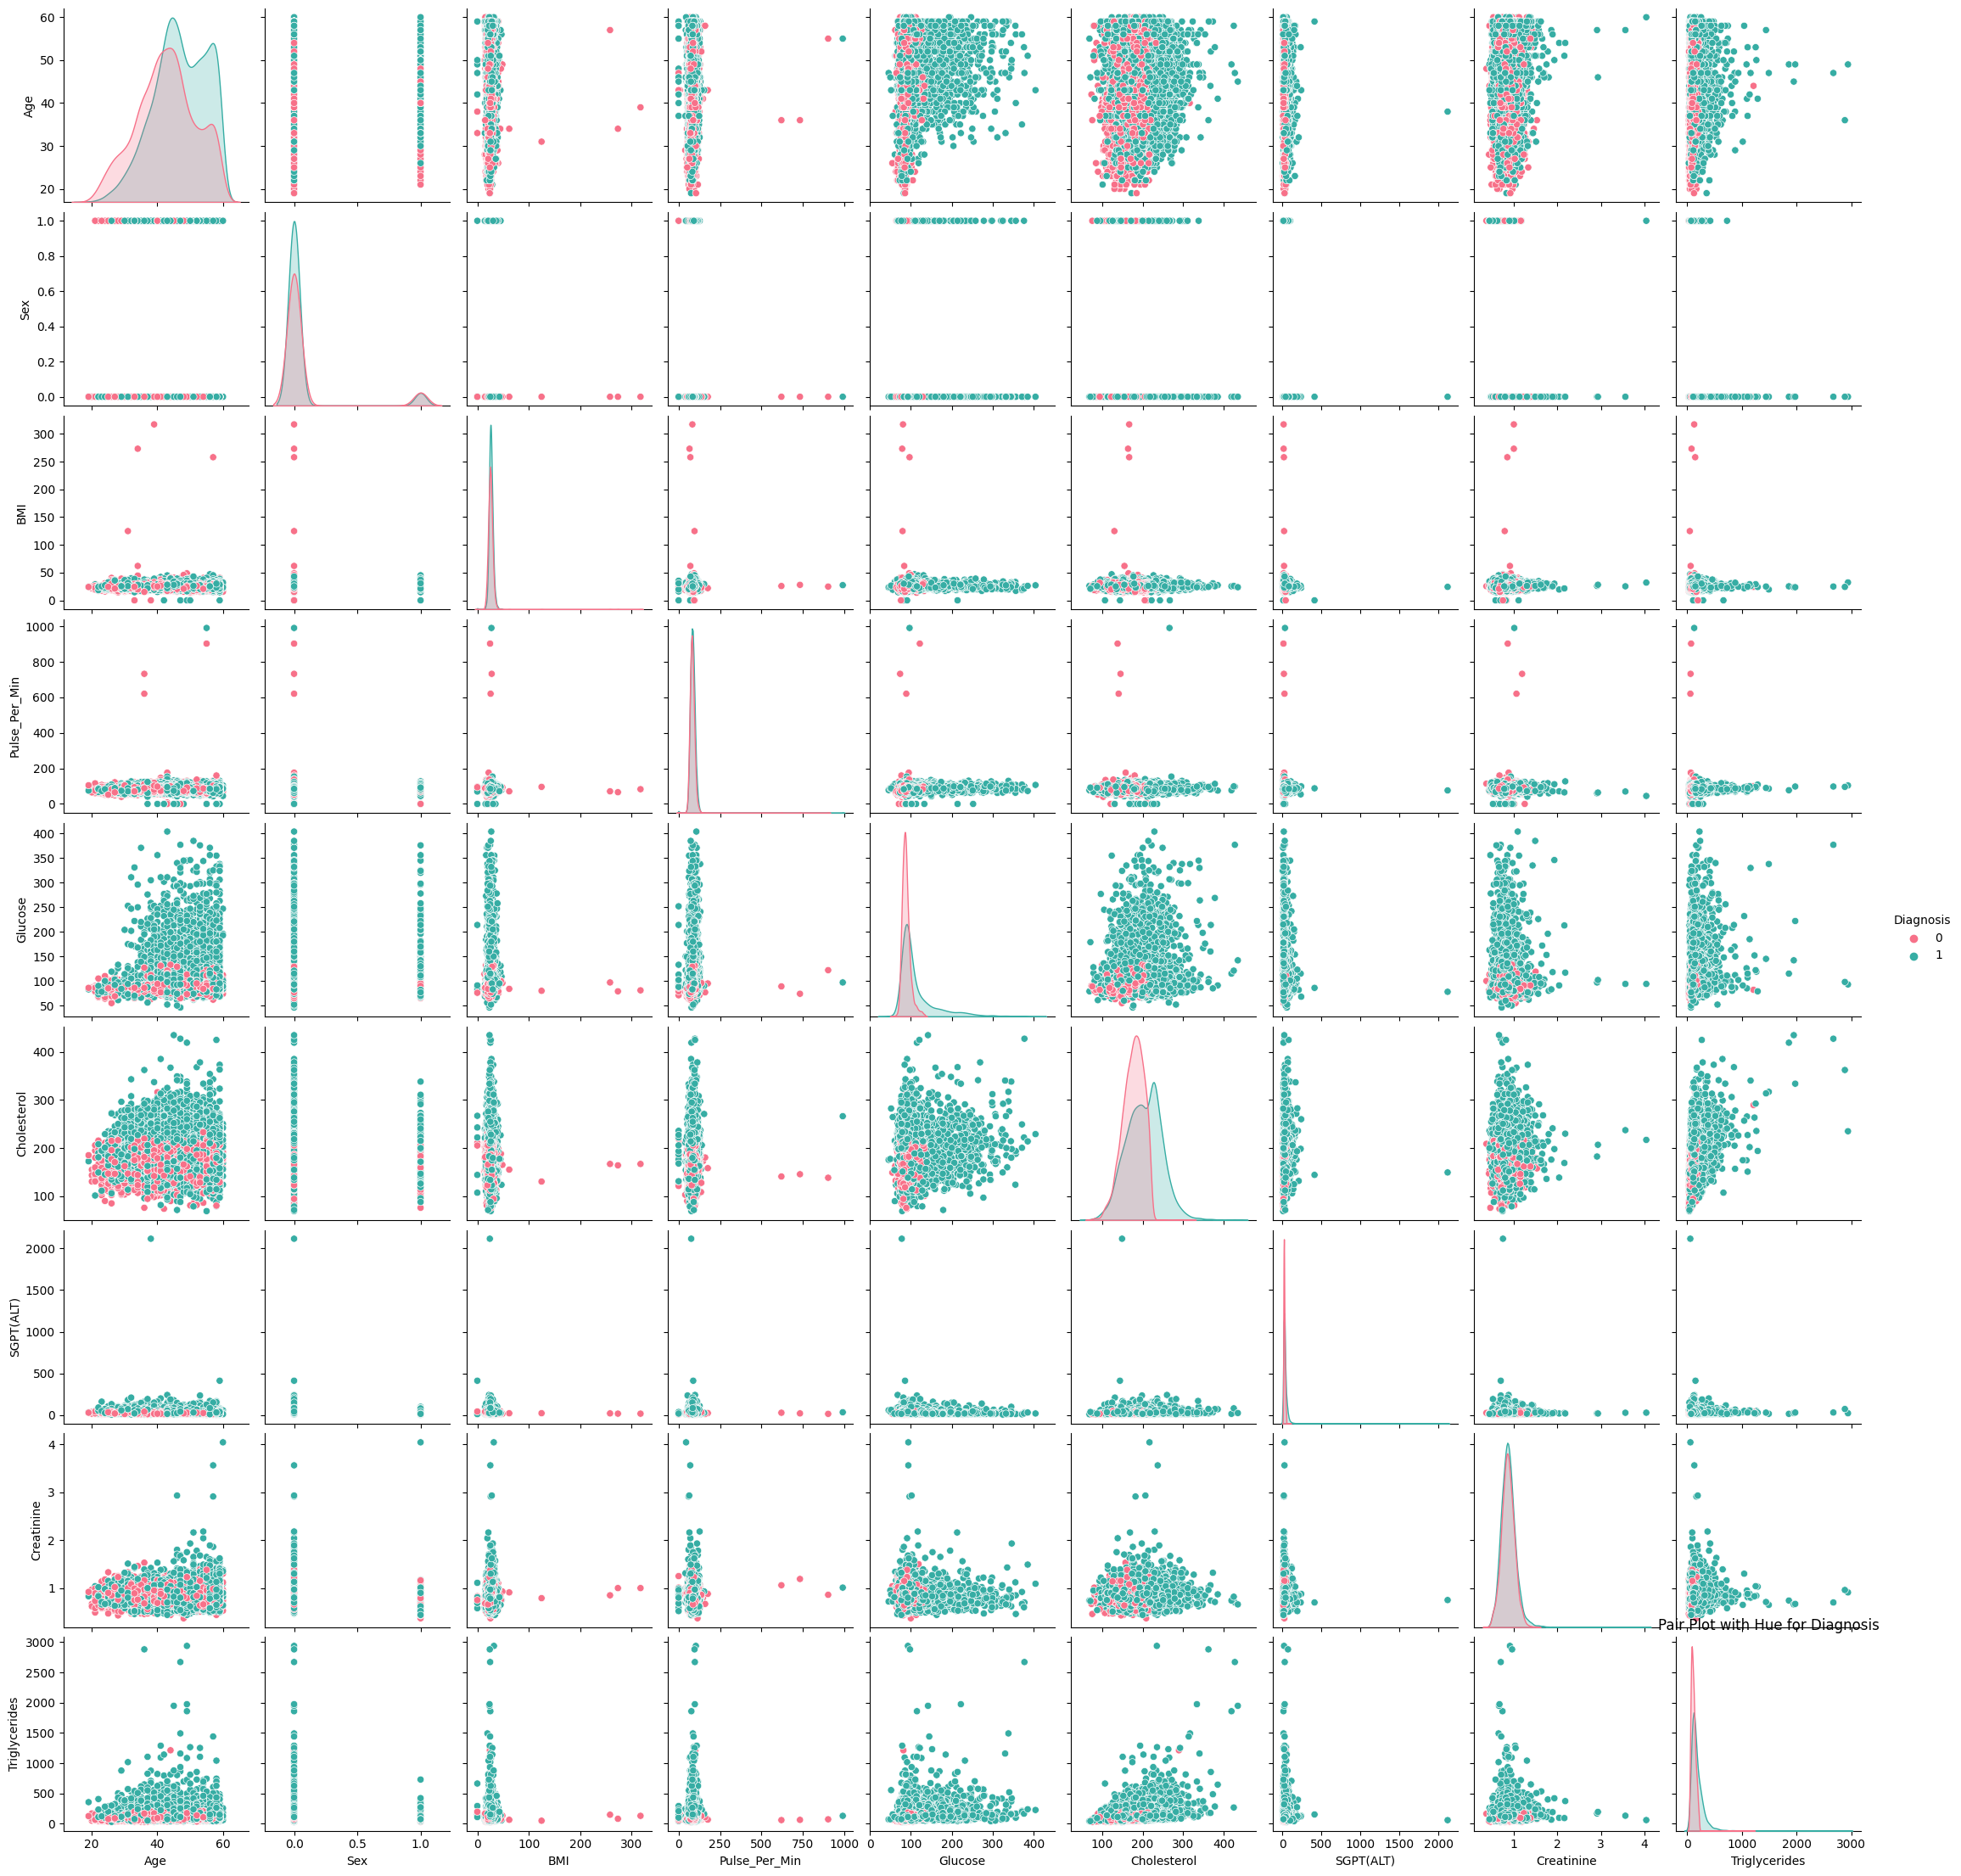

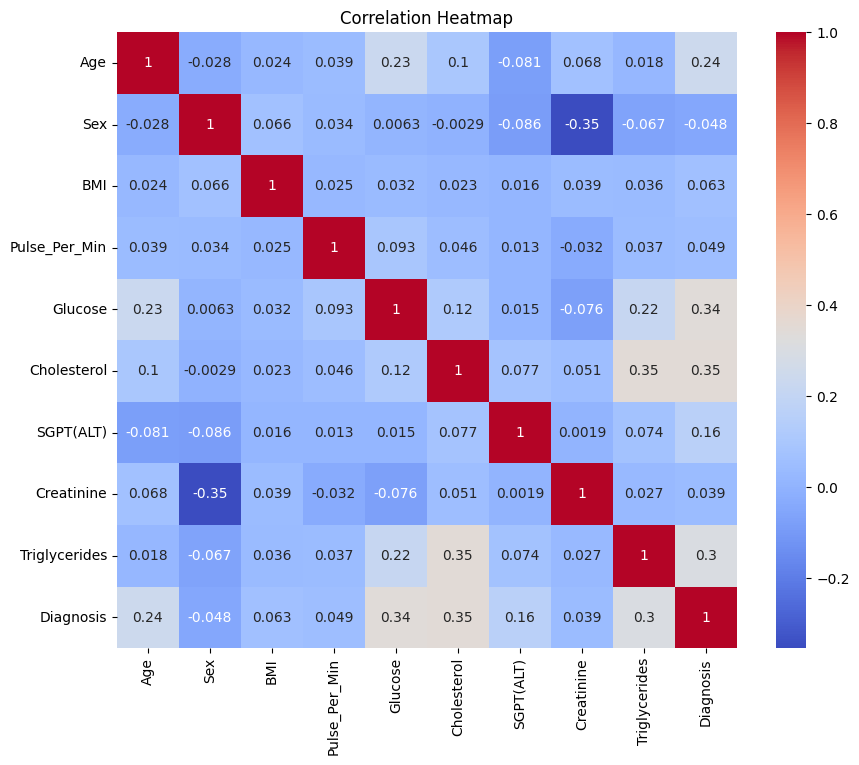

In [23]:
# Pair plot with hue for Diagnosis
sns.pairplot(data, hue='Diagnosis', diag_kind='kde', palette='husl')
plt.title('Pair Plot with Hue for Diagnosis')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Data preprocessing

In [24]:
# Drop rows with missing values
data.dropna(inplace=True)

# Separate features and target
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler())
])

X_train_processed = preprocessing_pipeline.fit_transform(X_train)
X_test_processed = preprocessing_pipeline.transform(X_test)

 Principal Component Analysis


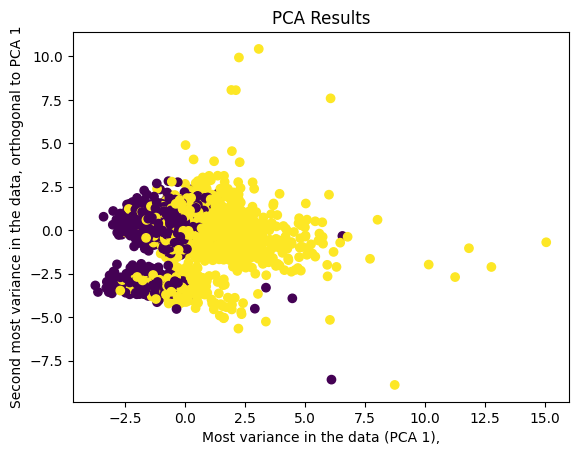

In [25]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_processed)
X_test_pca = pca.transform(X_test_processed)

# Visualizing PCA results
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Most variance in the data (PCA 1),')
plt.ylabel('Second most variance in the data, orthogonal to PCA 1')
plt.title('PCA Results')
plt.show()

Attributes considered:

1. Age
2. Sex
3. BMI
4. Pulse per min
5. Glucose
6. Cholestrol
7. SGPT (ALT)
8. Creatinine
9. Triglycerides
10. Diagnosis

After PCA

Attributes introduced:
1. PCA 1
Represents the direction in the original feature space along which the data varies the most.
2. PCA 2
This component represents the second most significant direction of variance, orthogonal to PCA 1







Training and Testing

In [29]:
# Training a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_processed, y_train)

# Predictions
y_pred = rf_model.predict(X_test_processed)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)



Accuracy: 0.87
Precision: 0.92
Recall: 0.82
F1-Score: 0.87
Confusion Matrix:
[[703  62]
 [149 691]]
